In [2]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


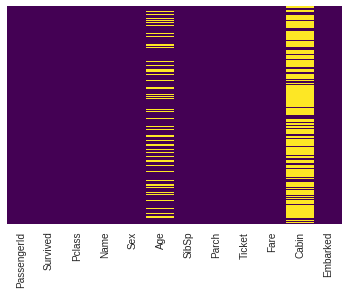

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

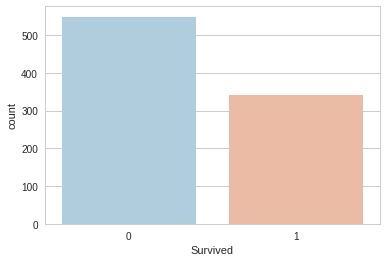

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

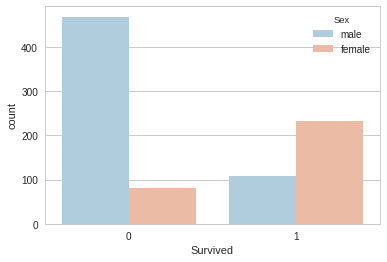

In [8]:
sns.countplot(x='Survived',hue='Sex', data=train, palette='RdBu_r')

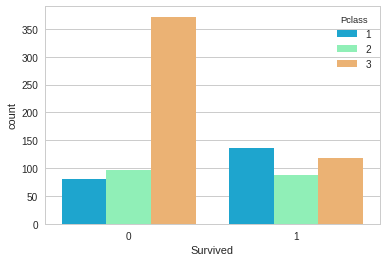

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train, palette='rainbow')

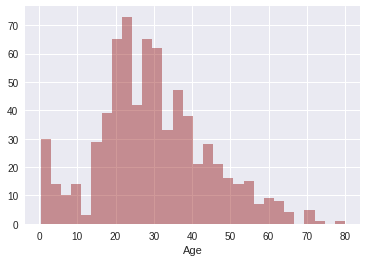

In [8]:
sns.distplot(train['Age'].dropna(),kde=False, color='darkred',bins=30)

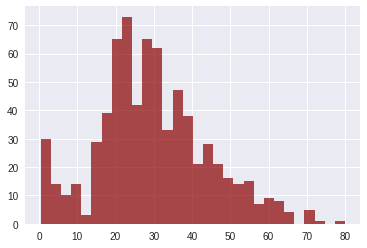

In [9]:
train['Age'].hist(bins=30,color='darkred', alpha=0.7)

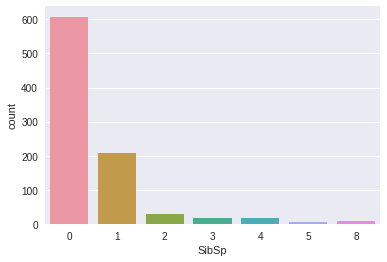

In [10]:
sns.countplot(x='SibSp', data=train)

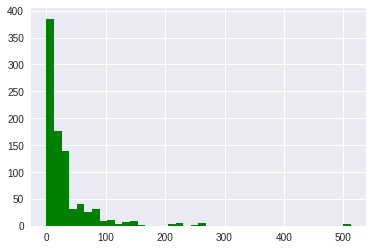

In [18]:
train['Fare'].hist(color='green',bins=40)

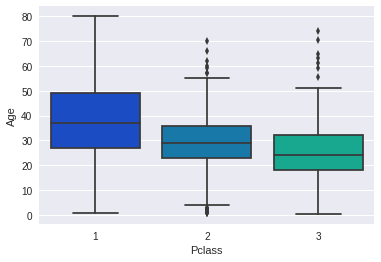

In [19]:
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else: 
            return 24
    else:
        return Age

In [16]:
train ['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

In [17]:
train.drop('Cabin', axis=1, inplace=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [22]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [21]:
sex

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [23]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [24]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
train = pd.concat((train,sex,embark),axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.30, random_state=101)
from sklearn.linear_model import LogisticRegression

In [34]:
x_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
520,521,1,30.0,0,0,93.5000,0,0,1
510,511,3,29.0,0,0,7.7500,1,1,0
446,447,2,13.0,0,1,19.5000,0,0,1
2,3,3,26.0,0,0,7.9250,0,0,1
691,692,3,4.0,0,1,13.4167,0,0,0


In [36]:
y_train.head()

520    1
510    1
446    1
2      1
691    1
Name: Survived, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()

In [39]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
predictions = logmodel.predict(x_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print (classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.77      0.88      0.82       154
          1       0.79      0.64      0.71       114

avg / total       0.78      0.78      0.77       268



In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
print(confusion_matrix(y_test, predictions))

[[135  19]
 [ 41  73]]
